<a href="https://colab.research.google.com/github/Boburshoh-oss/API-for-AWS/blob/main/Aviachipta_narxini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip aviachipta-narxini-bashorat-qilish.zip

Archive:  aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("train_data.csv",index_col=0)
df_test = pd.read_csv("test_data.csv",index_col=0)
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [4]:
df_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [6]:
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


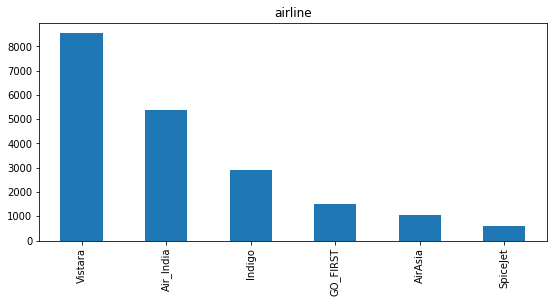

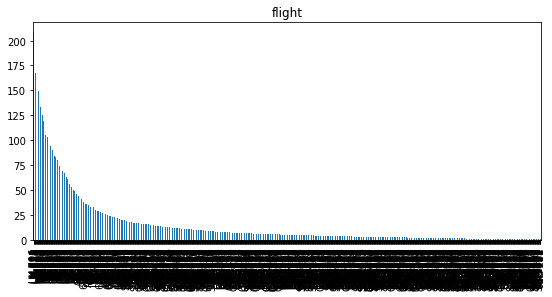

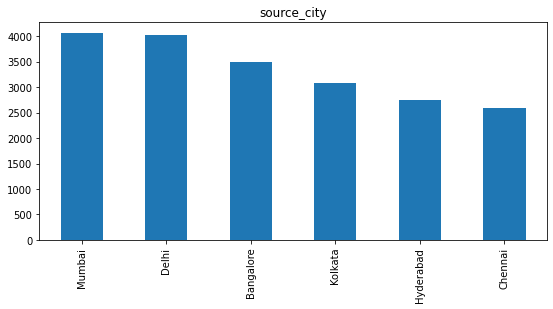

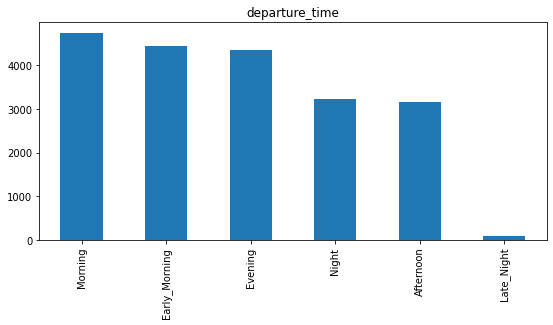

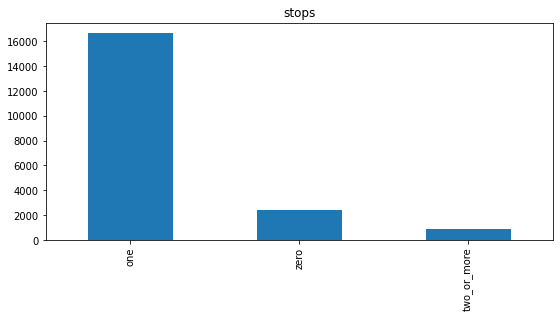

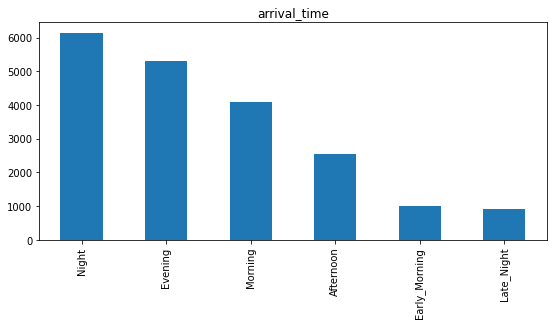

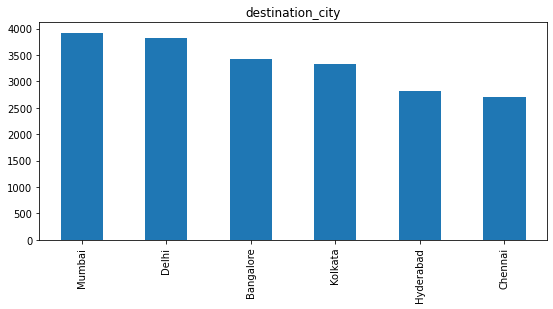

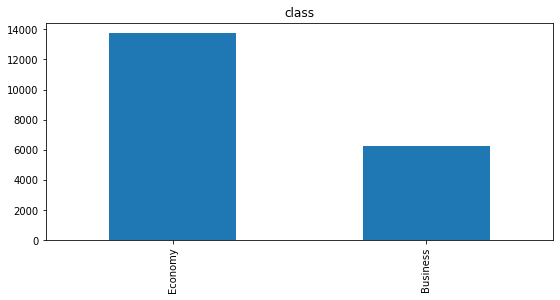

In [7]:
categorical_col = df.select_dtypes(include=['object']).columns

#plotting a bar chart for each of the categorical variable
for column in categorical_col:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  df[column].value_counts().plot(kind='bar')
  plt.title(column)

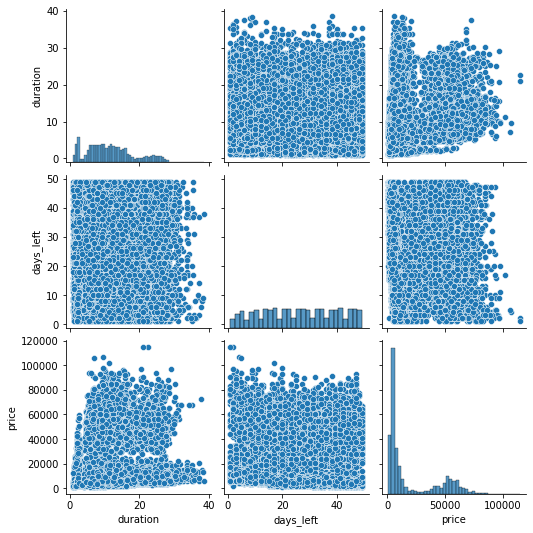

In [8]:
sns.pairplot(df[['duration','days_left','price']])
plt.show()

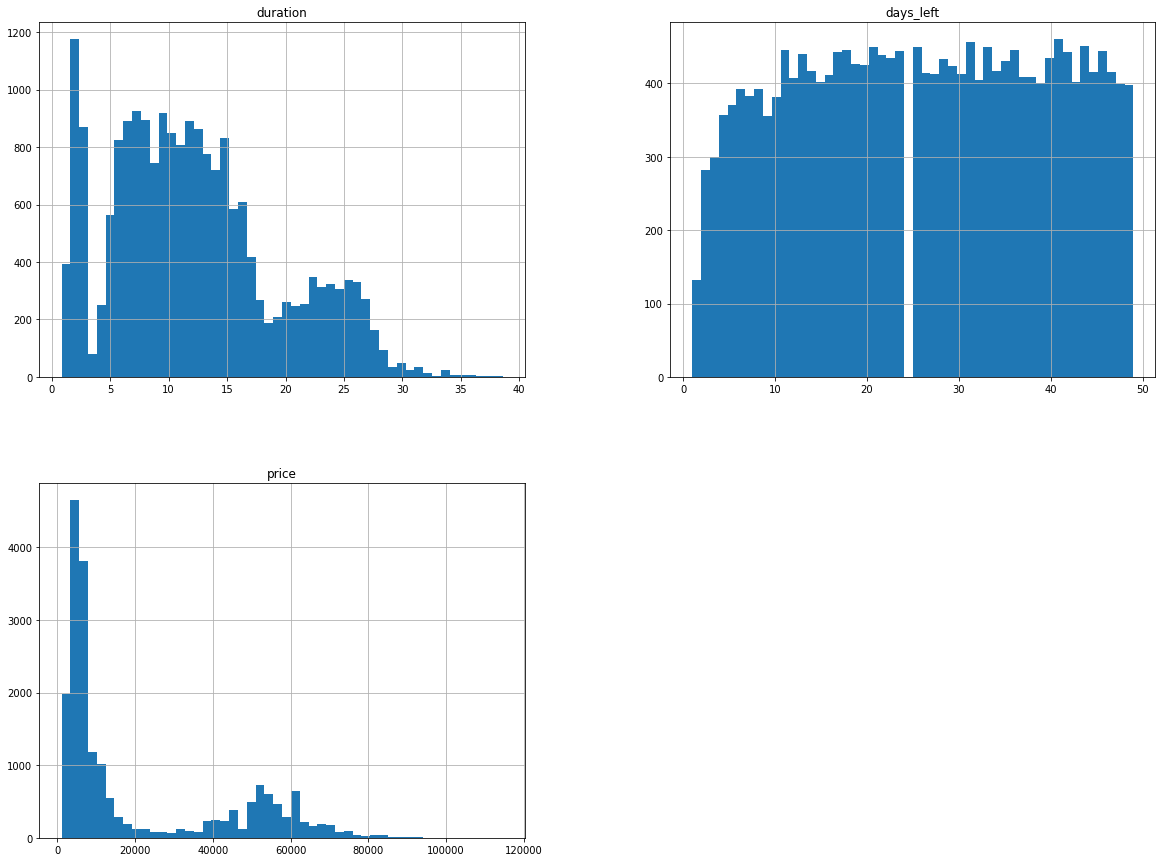

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.020091,0.213158
days_left,-0.020091,1.000000,-0.102545
price,0.213158,-0.102545,1.000000


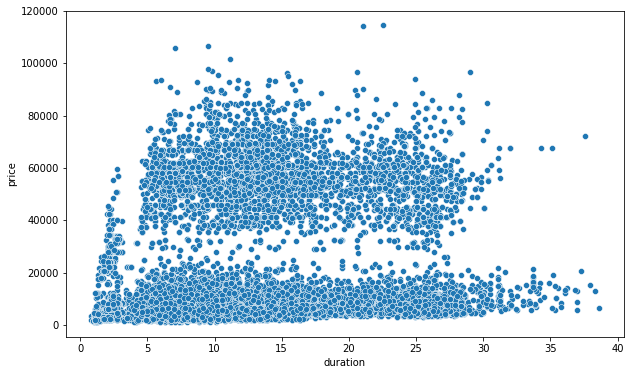

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='duration', y='price')
plt.show()

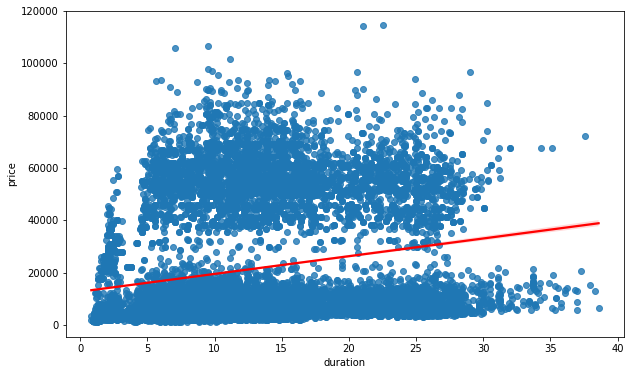

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='duration', y='price', line_kws={"color": "red"})
plt.show()

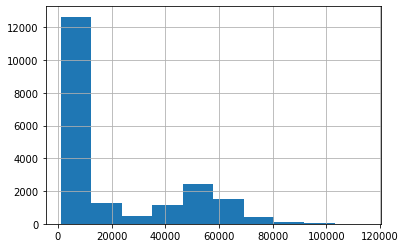

In [13]:
df['price'].hist()
plt.show()

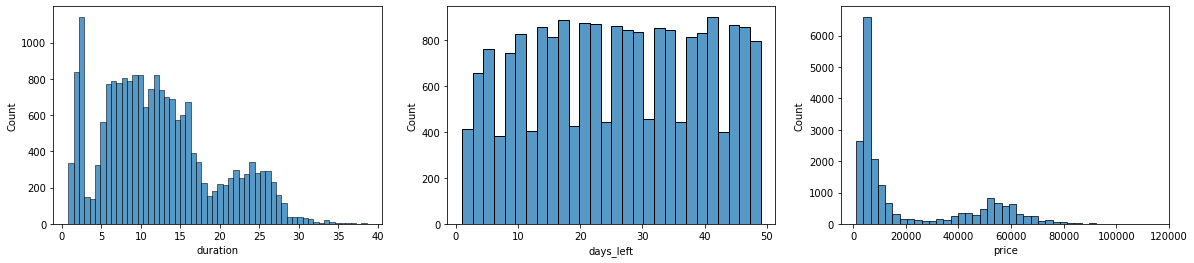

In [14]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sns.histplot(df['duration'])

plt.subplot(1,3,2)
sns.histplot(df['days_left'])

plt.subplot(1,3,3)
sns.histplot(df['price'])
plt.show()

In [15]:
df.nunique()

airline                6
flight              1310
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             404
days_left             49
price               4420
dtype: int64

In [16]:
df.groupby("class").mean()

,duration,days_left,price
class,,,
Business,13.715785,25.472707,52653.102289
Economy,11.478952,26.129208,6564.509852


In [17]:
df.groupby("arrival_time").mean()

,duration,days_left,price
arrival_time,,,
Afternoon,11.312390,26.022476,18033.166009
Early_Morning,12.428277,27.821713,13961.313745
Evening,12.523328,25.505643,23375.381866
Late_Night,8.819203,27.521834,10841.620087
Morning,14.063395,25.880323,22943.914097
Night,11.441044,25.726473,21412.093618


In [18]:
df.groupby("departure_time").mean()

,duration,days_left,price
departure_time,,,
Afternoon,10.685224,25.652243,18572.809855
Early_Morning,11.545898,25.963673,20106.425090
Evening,13.435870,25.903478,21363.615757
Late_Night,7.792174,30.434783,8485.010870
Morning,11.390794,25.897425,21633.400802
Night,14.094745,26.074899,23297.218199


In [28]:
df.groupby("airline").mean()
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# define a custom encoding function
def custom_encode(val):
    return val[0:2]

In [41]:
#Dataset Preprocessing
def preprocessing_data(df):
  # apply the custom encoding function to the column
  df['flight'] = df['flight'].apply(custom_encode)
  flight = df[['flight']]
  flight = pd.get_dummies(flight,drop_first=True)
  
  df['stops'] = df['stops'].replace({"one":1,"two_or_more":2,"zero":0})
  df["class"] = df["class"].replace({"Business":7,"Economy":1})
  df["airline"] = df["airline"].replace({"AirAsia":4,"Air_India":23,"GO_FIRST":5,"Indigo":5,"SpiceJet":6,"Vistara":30})
  df['source_city'] = ordinal_encoder.fit_transform(df[['source_city']])
  categorical_features = ["departure_time", "arrival_time","destination_city"]
  ordinal_encoder.fit(df[categorical_features])
  df[categorical_features] = ordinal_encoder.transform(df[categorical_features])
  data_train = pd.concat([df,flight],axis=1)
  data_train.drop(['flight'],axis=1,inplace=True)
  return data_train


In [42]:
df_prep = preprocessing_data(df)
df_test_prep = preprocessing_data(df_test)

In [43]:
df_prep

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_AI,flight_G8,flight_I5,flight_SG,flight_UK
id,,,,,,,,,,,,,,,
1,30,0.0,1.0,1,5.0,5.0,1,14.25,21,7212,0,0,0,0,1
2,6,3.0,2.0,0,5.0,4.0,1,1.75,7,5292,0,0,0,1,0
3,30,0.0,4.0,1,2.0,2.0,2,9.58,5,60553,0,0,0,0,1
4,30,4.0,4.0,1,2.0,3.0,1,6.75,28,5760,0,0,0,0,1
5,5,1.0,1.0,0,4.0,5.0,1,2.00,4,10712,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,5,0.0,5.0,1,1.0,5.0,1,7.92,45,3153,0,0,0,0,0
19997,4,4.0,4.0,1,0.0,2.0,1,5.83,24,3911,0,0,1,0,0
19998,30,1.0,1.0,2,2.0,0.0,1,35.33,17,14822,0,0,0,0,1


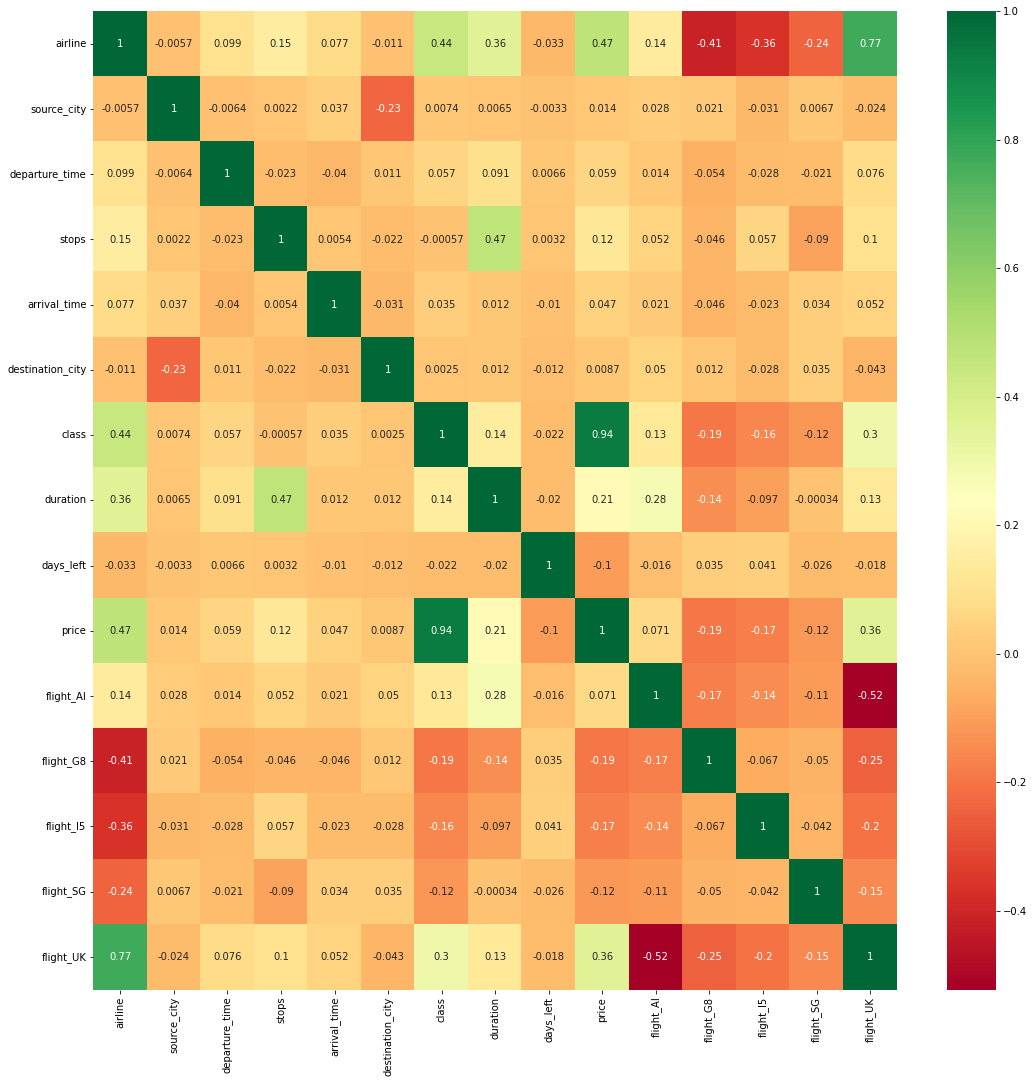

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(df_prep.corr(),annot=True,cmap="RdYlGn")
plt.show()

Normalizing

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
features = df_prep.drop(columns='price',axis=1)
Y = df_prep['price']

In [48]:
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(features_normalized,Y, test_size=0.2,random_state=10)

#**Linear Regression**

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LinearReg = LinearRegression().fit(x_train,y_train)

In [52]:
predictions = LinearReg.predict(x_test)


In [53]:
analiz = pd.DataFrame({'Asl narxi':y_test, 'Prognoz':predictions})
analiz

,Asl narxi,Prognoz
id,,
19779,5954,3315.0625
4377,3013,-1530.5625
10189,2050,5623.8125
9888,5761,8127.7500
4442,4203,29.6250
...,...,...
13124,61597,54970.7500
18707,10731,9733.8125
7275,2050,5588.3125


In [54]:
import sklearn.metrics as metrics

In [55]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test,predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test,predictions)
LinearRegression_R2 = metrics.r2_score(y_test,predictions)
print(f"MAE:{LinearRegression_MAE}\nMSE:{LinearRegression_MSE}\nR2Score:{LinearRegression_R2}")

MAE:4565.158203125
MSE:46996138.410444334
R2Score:0.9096069023846611


Random Forest regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
# Create an instance of the Random Forest model
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(x_train, y_train)

RandomForestRegressor()

In [68]:
# Make predictions on the testing data
y_pred = rf.predict(x_test)

In [69]:
rf.score(x_train,y_train)

0.9958770572519698

In [70]:
rf.score(x_test,y_test)

0.9705299707915893

In [71]:
analiz = pd.DataFrame({'Asl narxi':y_test, 'Prognoz':predictions})
analiz

,Asl narxi,Prognoz
id,,
19779,5954,3315.0625
4377,3013,-1530.5625
10189,2050,5623.8125
9888,5761,8127.7500
4442,4203,29.6250
...,...,...
13124,61597,54970.7500
18707,10731,9733.8125
7275,2050,5588.3125


In [73]:
from sklearn.metrics import mean_squared_error

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("RMSE:",np.sqrt(mse))

Mean Squared Error: 15321718.230433654
RMSE: 3914.2966456866366


In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

# Create a Random Forest Classifier object
rfc = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

# Train the RandomizedSearchCV object on the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Accuracy score: {random_search.best_score_:.3f}")

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 95}
Accuracy score: 0.959


In [81]:
y_pred = random_search.predict(x_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("RMSE:",np.sqrt(mse))

Mean Squared Error: 21611626.91652798
RMSE: 4648.830704223157


In [87]:
# Create a Random Forest Regressor object with the best hyperparameters
rfr = RandomForestRegressor(n_estimators=95, max_depth=9, min_samples_split=16, min_samples_leaf=2)

In [88]:
# Train the model on your entire dataset
rfr.fit(x_train, y_train)

# Make predictions on new data
y_pred = rfr.predict(x_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("RMSE:",np.sqrt(mse))

Mean Squared Error: 21435978.175769392
RMSE: 4629.9004498768


**ExtraTreesRegressor modeli**

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor() 
selection.fit(x_train,y_train)

ExtraTreesRegressor()

In [75]:
y_pred = selection.predict(x_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("RMSE:",np.sqrt(mse))

Mean Squared Error: 15907360.27868332
RMSE: 3988.4032241842497


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


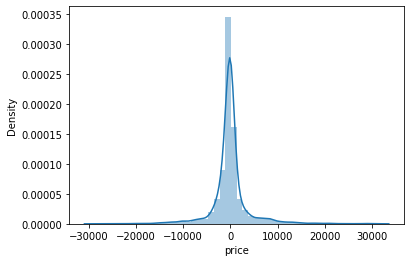

In [78]:
sns.distplot(y_test-y_pred)
plt.show()

**Endi tanlagan algoritimiz  bilan butun datasetni training qildiramiz!**

In [90]:
# Create an instance of the Random Forest model
rf_main = RandomForestRegressor()

# Train the model on the training data
rf_main.fit(features_normalized, Y)

RandomForestRegressor()

In [91]:
features_test = pd.DataFrame(scaler.fit_transform(df_test_prep), columns=df_test_prep.columns)

In [94]:
last_predict = rf_main.predict(features_test)

In [93]:
ss_df = pd.read_csv('sample_solution.csv', index_col=0)
ss_df.shape

(5000, 1)

In [95]:
ss_df['price']=last_predict

In [96]:
ss_df.head()

,price
id,
1,54889.16
2,54364.87
3,22286.36
4,2437.35
5,5680.81


In [97]:
ss_df.to_csv('airline_predict_price.csv')